### 이번 미니 프로젝트는 90% 이상을을 쳇지피티의 도움으로 작성 하였습니다.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_excel(r"C:\Users\shoot\OneDrive\Desktop\online_retail_II.xlsx")
data.to_csv(r"C:\Users\shoot\OneDrive\Desktop\online_retail_II.csv", index=False)

In [59]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [60]:
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [61]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [62]:
data = data.dropna(subset=['Customer ID'])

In [63]:
country_customer = data.groupby('Country')['Customer ID'].nunique()

In [64]:
country_customer = country_customer.sort_values(ascending=False)

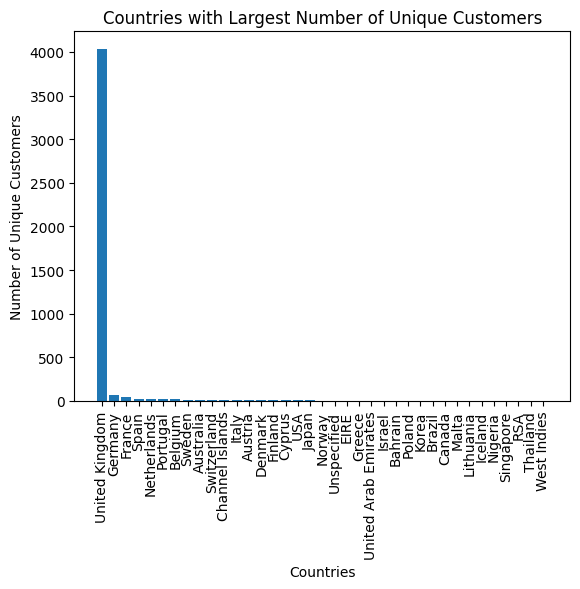

In [65]:
plt.bar(country_customer.index, country_customer.values)
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.title('Countries with Largest Number of Unique Customers')
plt.xticks(rotation=90)
plt.show()

In [66]:
first_purchase = data.groupby('Customer ID')['InvoiceDate'].min()

In [67]:
first_purchase_month = first_purchase.dt.to_period('M')

In [68]:
new_customers_per_month = first_purchase_month.value_counts().sort_index()

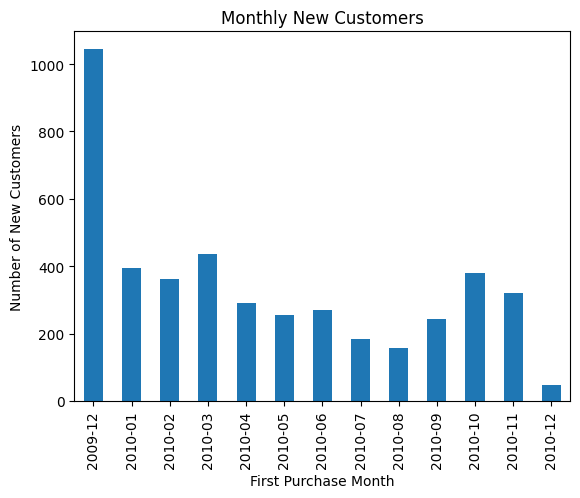

In [69]:
new_customers_per_month.plot(kind='bar')
plt.xlabel('First Purchase Month')
plt.ylabel('Number of New Customers')
plt.title('Monthly New Customers')
plt.show()

In [70]:
total_customers = data['Customer ID'].nunique()

In [71]:
data['TotalPrice'] = data['Quantity'] * data['Price']

In [72]:
customer_total = data.groupby('Customer ID')['TotalPrice'].sum()

In [73]:
activated_customers = customer_total[customer_total >= 50]

In [74]:
activated_count = activated_customers.nunique()

In [75]:
activation_rate = activated_count / total_customers * 100

In [76]:
print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): {activated_count}")
print(f"고객 활성화율: {activation_rate:.2f}%")

총 고객 수: 4383
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): 4154
고객 활성화율: 94.78%


In [77]:
data['Quarter'] = data['InvoiceDate'].dt.to_period('Q')
data['Cohort'] = data.groupby('Customer ID')['Quarter'].transform('min')

def cohort_index(df):
    return (df['Quarter'].dt.year - df['Cohort'].dt.year) * 4 + (df['Quarter'].dt.quarter - df['Cohort'].dt.quarter)

data['CohortIndex'] = cohort_index(data)

In [78]:
cohort_data = data.groupby(['Cohort', 'CohortIndex'])['Customer ID'].nunique().unstack()
retention = cohort_data.divide(cohort_data.iloc[:,0], axis=0) * 100

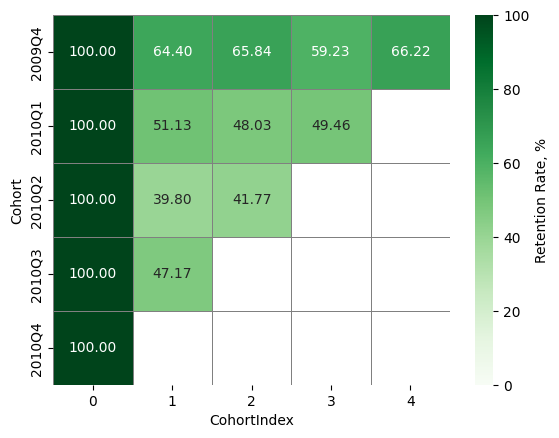

In [79]:
#히트맵 코드
heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)

In [82]:
average_quantity = data.groupby(['Cohort', 'CohortIndex'])['Quantity'].mean().unstack()

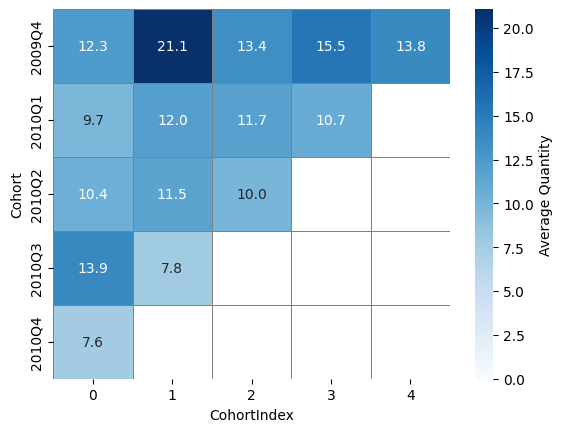

In [83]:
#heatmap 코드
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)

In [85]:
data['TotalPrice'] = data['Quantity'] * data['Price']

In [86]:
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

In [87]:
monthly_revenue = data.groupby(['YearMonth', 'Customer ID'])['TotalPrice'].sum()

In [88]:
arpu = monthly_revenue.groupby('YearMonth').mean()

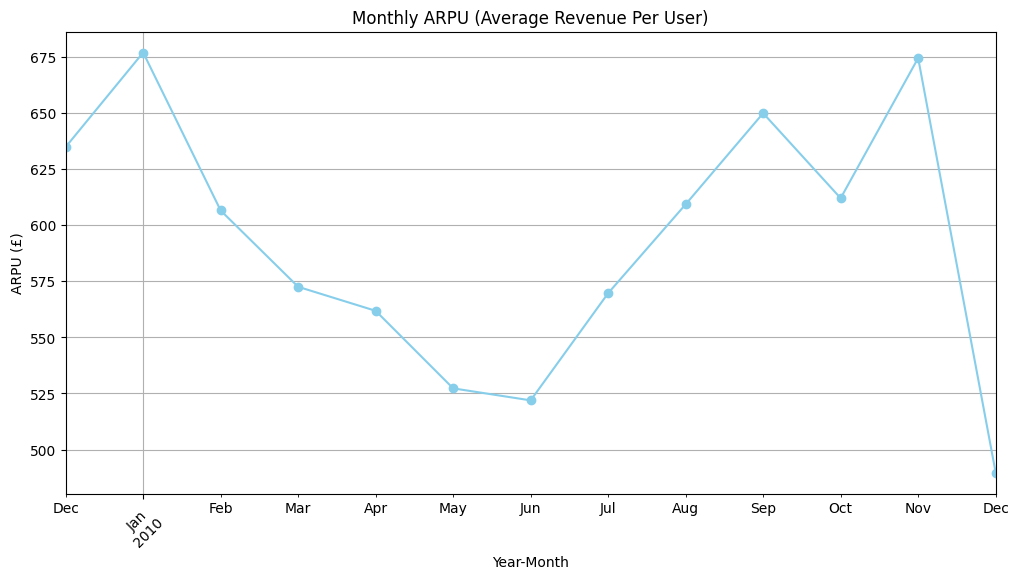

In [89]:
#시각화코드
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [90]:
avg_order_value = data.groupby('Customer ID')['TotalPrice'].mean()

In [91]:
purchase_frequency = data.groupby('Customer ID')['Invoice'].nunique()

In [92]:
retention_time = (data.groupby('Customer ID')['InvoiceDate'].max() - data.groupby('Customer ID')['InvoiceDate'].min()).dt.days + 1

In [93]:
clv = avg_order_value * purchase_frequency * retention_time

In [94]:
clv = clv.sort_values(ascending=False)

In [98]:
clv.head()

Customer ID
18102.0    1.912335e+07
17949.0    1.416688e+07
15838.0    6.054286e+06
16029.0    5.232407e+06
13694.0    5.007023e+06
dtype: float64

In [99]:
import random

outcomes = [1 if random.random() < 0.3 else 0 for _ in range(10)]
success_count = outcomes.count(1)

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")


각 시도 결과: [0, 1, 0, 0, 0, 1, 0, 1, 0, 1]
성공 횟수: 4


In [100]:
scores = []

for _ in range(20):
    score = 0
    for _ in range(5):
        if random.random() < 0.7:
            score += 1
    scores.append(score)

average_score = sum(scores) / len(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")


학생별 점수: [4, 5, 5, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 5, 4, 2, 3, 3, 4]
평균 점수: 3.90


45g 이상 55g 이하 비율: 68.50%


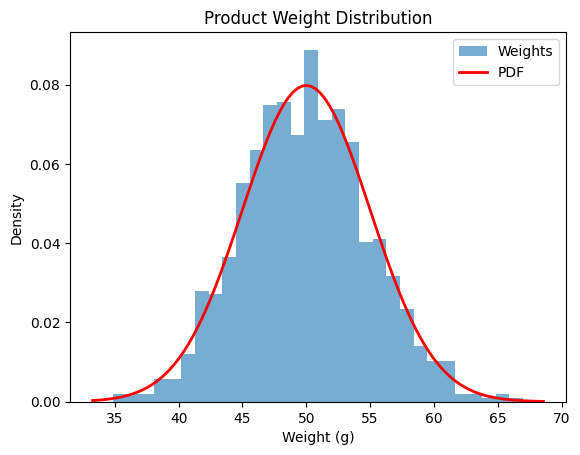

In [101]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# 1. 데이터 만들기
weights = []
for _ in range(1000):
    weight = random.gauss(50, 5)
    weights.append(weight)

# 2. 비율 계산
count = 0
for w in weights:
    if 45 <= w <= 55:
        count += 1

within_range = count / len(weights)

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

# 3. 히스토그램 + 정규분포 곡선 그리기
plt.hist(weights, bins=30, density=True, alpha=0.6, label="Weights")

# PDF 그리기
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 50, 5)
plt.plot(x, p, 'r', linewidth=2, label="PDF")

plt.xlabel('Weight (g)')
plt.ylabel('Density')
plt.title('Product Weight Distribution')
plt.legend()
plt.show()